In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the savings dataset

df_savings= pd.read_csv('saving.csv')

df_savings.head()

,Unnamed: 0,sav,inc,size,educ,age,black,cons
0,1,30,1920,4,2,40,1,1890
1,2,874,12403,4,9,33,0,11529
2,3,370,6396,2,17,31,0,6026
3,4,1200,7005,3,9,50,0,5805
4,5,275,6990,4,12,28,0,6715


In [3]:
#checking the number of rows and columns of the dataset

df_savings.shape

(100, 8)

In [4]:
#checking the column labels of the dataset

df_savings.columns

Index(['Unnamed: 0', 'sav', 'inc', 'size', 'educ', 'age', 'black', 'cons'], dtype='object')

In [5]:
#Dropping Unnamed: 0, it has no logical impact on the dataset

df_savings1 = df_savings.drop('Unnamed: 0', axis=1)
df_savings1.head()

,sav,inc,size,educ,age,black,cons
0,30,1920,4,2,40,1,1890
1,874,12403,4,9,33,0,11529
2,370,6396,2,17,31,0,6026
3,1200,7005,3,9,50,0,5805
4,275,6990,4,12,28,0,6715


In [57]:
#Testing the 20% saving rule

expected_savings = data_savings.assign(Twenty_percnt_Sav =lambda x: x.inc*0.2)

expected_savings.head()

#none of the correspondent follows the 20% savings rule, most saved below 20% while very few saved above 20%

,sav,inc,size,educ,age,black,cons,Twenty_percnt_Sav
0,30,1920,4,2,40,1,1890,384.0
1,874,12403,4,9,33,0,11529,2480.6
2,370,6396,2,17,31,0,6026,1279.2
3,1200,7005,3,9,50,0,5805,1401.0
4,275,6990,4,12,28,0,6715,1398.0
...,...,...,...,...,...,...,...,...
93,720,14963,4,12,46,0,14243,2992.6
94,5109,10060,4,16,50,0,4951,2012.0
96,1684,9260,5,12,31,0,7576,1852.0
97,1475,10450,2,18,27,0,8975,2090.0


# Questions

In [6]:
#do people who earn more money have more savings ? 
#Does Educational level influence how much people earn and how they save 
#Does family Size influence saving culture
#Are there any correlation between race and income ? 
#Does race as any impact on savings 

In [7]:
df_savings1['age'].describe()

count    100.000000
mean      38.770000
std        7.398956
min       26.000000
25%       33.000000
50%       38.500000
75%       44.000000
max       54.000000
Name: age, dtype: float64

<AxesSubplot:xlabel='age'>

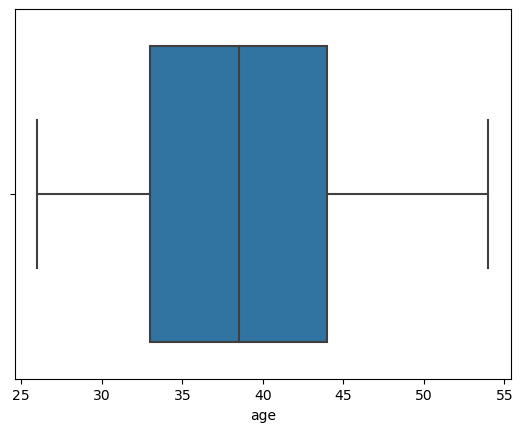

In [8]:
#checking for Outliers 
#The respondents are within the same age range

sns.boxplot(data=df_savings1,x='age')

The analysis below will be testing the following:
 1. Do people who earn more money have more savings 
 2. Are there any correlation between race and income ? 
 3. Does race have any impact on savings

In [10]:
#checking for average salary earned. mean
#the median salary, which is the 50%

df_savings1['inc'].describe()


count      100.000000
mean      9941.240000
std       5583.998057
min        750.000000
25%       6510.000000
50%       8776.500000
75%      11903.000000
max      32080.000000
Name: inc, dtype: float64

In [11]:
#The desribe method above shows very high income earners, this high income earners are outside the average income of the sample size(these are outliers) 

<AxesSubplot:xlabel='inc'>

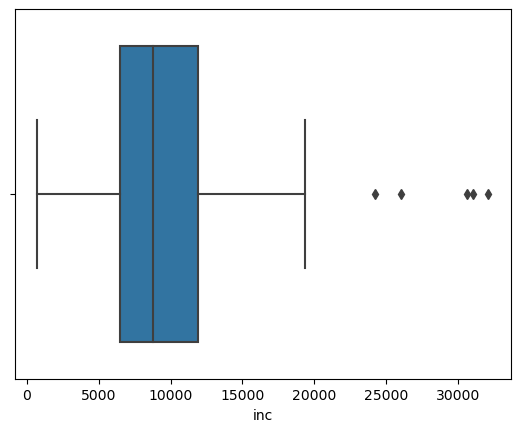

In [12]:
#checking for Outliers 

sns.boxplot(data=df_savings1,x='inc')

#there are outliers in the income column, i.e there are people that earns very high income, we will be checking the saving culture of this high earners

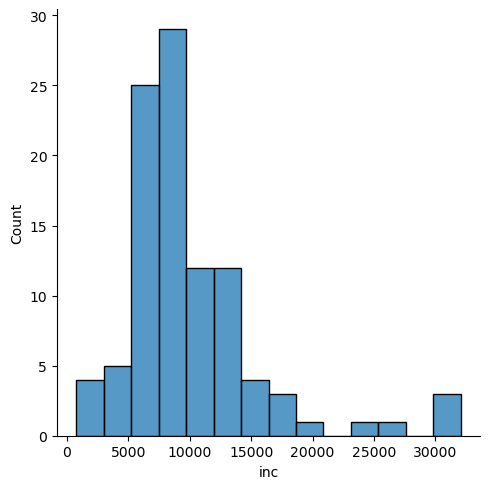

In [13]:
sns.displot(data=df_savings1, x='inc', kde=False) #distribution plot

In [14]:
#The distribution above shows 5 people within the dataset earns 20,000-30000
# The impact of this earning is going to be tested against their saving and consumption culture

<AxesSubplot:xlabel='inc', ylabel='sav'>

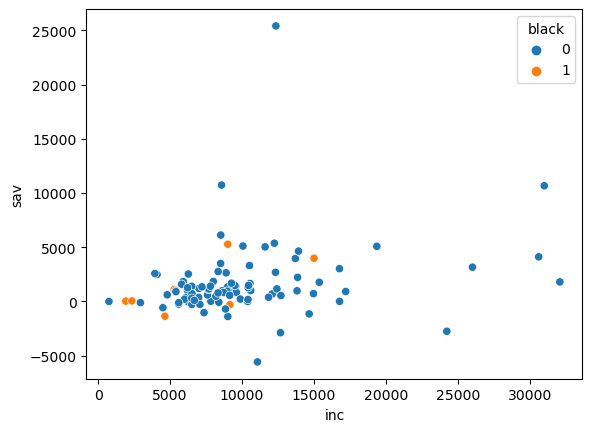

In [16]:
sns.scatterplot(data=df_savings1, x='inc', y='sav', hue='black')

In [17]:
df_savings1.tail()

,sav,inc,size,educ,age,black,cons
95,1800,32080,2,16,54,0,30280
96,1684,9260,5,12,31,0,7576
97,1475,10450,2,18,27,0,8975
98,566,9138,5,12,40,0,8572
99,25405,12350,6,18,34,0,-13055


In [18]:
#The scatterd plot visualisation above showed an anomaly in row 99 of the sample size, the respondent made an annual income of 12350 and saved 25405, no logical explation was given in the documentaion for this anomaly
#The scattered Plot also showed that the saving culture of the family whose head is black is not different from the other race
# Race has no visible effect on savings
#A total of 5 person earned between 20000-30000 (The outlier 20000-30000),this people earned more but saves around the same amount to those than earned lower


In [26]:
df_savings2= df_savings1.copy()
df_savings2

,sav,inc,size,educ,age,black,cons
0,30,1920,4,2,40,1,1890
1,874,12403,4,9,33,0,11529
2,370,6396,2,17,31,0,6026
3,1200,7005,3,9,50,0,5805
4,275,6990,4,12,28,0,6715
...,...,...,...,...,...,...,...
95,1800,32080,2,16,54,0,30280
96,1684,9260,5,12,31,0,7576
97,1475,10450,2,18,27,0,8975
98,566,9138,5,12,40,0,8572


In [53]:
#rows with negative cons (consumption value will be dropped, as we have no justification how they were able to save more than their income)
df_savings3 = df_savings2.drop([67,99])

#row 67 and 99 was dropped because of the anomaly in the record
df_savings3.head()

,sav,inc,size,educ,age,black,cons
0,30,1920,4,2,40,1,1890
1,874,12403,4,9,33,0,11529
2,370,6396,2,17,31,0,6026
3,1200,7005,3,9,50,0,5805
4,275,6990,4,12,28,0,6715


In [31]:
#Tukey's rule
#Q1-1.5*IQR - Lower limit
#Q3 + 1.5*IQR - upper limit

#The Tukey's rule will be applied to try to eliminate the Outliers in the income column

In [39]:
Q1= df_savings3['inc'].quantile(.25)
Q3= df_savings3['inc'].quantile(.75)
IQR= Q3-Q1

In [33]:
IQR

5393.0

In [34]:
lower_limit = Q1- 1.5* IQR
upper_limit= Q3 + 1.5* IQR 

In [35]:
lower_limit

-1579.5

In [36]:
upper_limit

19992.5

In [41]:
outlier_upper =(df_savings3['inc']> upper_limit)

In [42]:
outlier_upper

0     False
1     False
2     False
3     False
4     False
      ...  
94    False
95     True
96    False
97    False
98    False
Name: inc, Length: 98, dtype: bool

In [43]:
len(df_savings3['inc'])- len(df_savings3['inc'][outlier_upper])

93

In [44]:
data_savings = df_savings3[-(outlier_upper)]

In [45]:
data_savings.shape

(93, 7)

In [46]:
df_savings3['inc'][outlier_upper]

6     26007
35    30996
44    24226
80    30610
95    32080
Name: inc, dtype: int64

<AxesSubplot:xlabel='inc'>

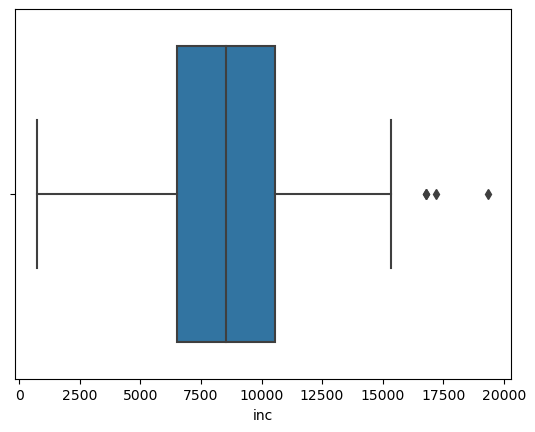

In [47]:
#visualising the data without outliers
sns.boxplot(data=data_savings, x='inc')

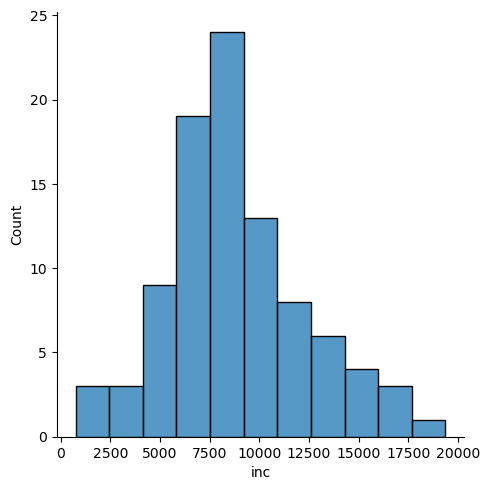

In [48]:
sns.displot(data=data_savings, x='inc', kde=False)

<AxesSubplot:xlabel='inc', ylabel='sav'>

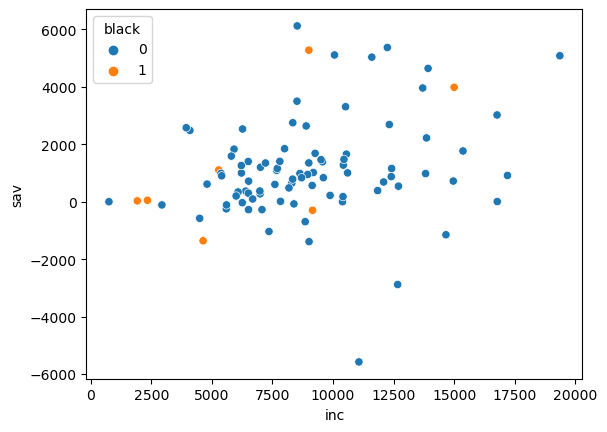

In [49]:
sns.scatterplot(data=data_savings, x="inc", y="sav", hue="black")

In [50]:
#The scattered plot visualisation above showed the following:
   # The people that earned more didnt save more infact majority of the high income earners had high negative savings value i.e they are in debt
   # Race has no impact on Income neither does it has any impact on savings , the saving cuture of either black is the same with those of other race within the same income bracket

The Analysis below will be answering the following questions
   
    1.Does Educational level influence how much people earn and how they save 

<AxesSubplot:xlabel='inc', ylabel='sav'>

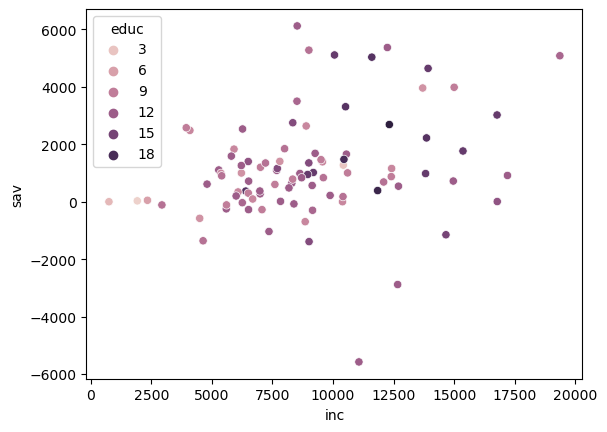

In [51]:
sns.scatterplot(data=data_savings, x="inc", y="sav", hue="educ")


The scattered plot aboved showed level of education as no impact on income and also has no impact on savings,The highest earner had an educational level of up to 12 earned more than those that has educational level of 18

2. the people that earned between 0-10000 saves around the same amount (0-6000) annually , people that earned from 10000-20000 had savings between(-6000 to 5000)



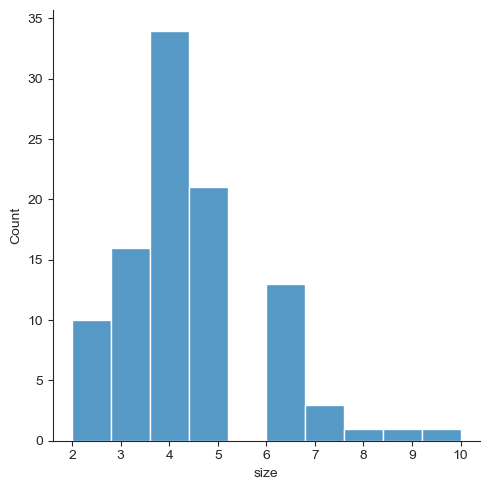

In [59]:
#Does family Size influence saving culture
sns.displot(data=df_savings1, x='size', kde=False)

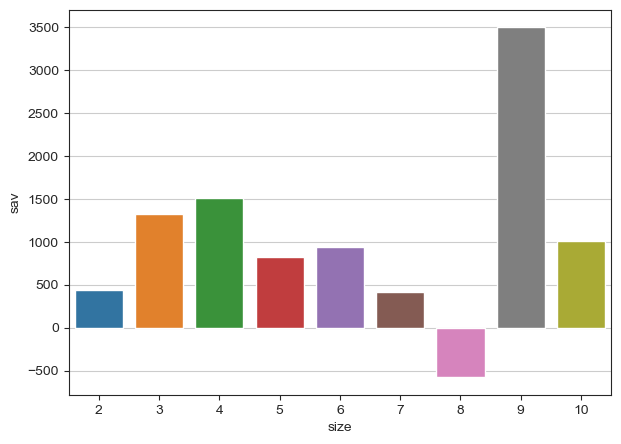

In [58]:
# Does family Size influence saving culture

sns.set_style("ticks",{'axes.grid' : False})

figure, axes = plt.subplots(figsize=(7, 5))

sns.barplot(x="size", y="sav", data=data_savings, ci=0)

axes.grid(visible=True, which="both", axis="y")
axes.set_axisbelow(True)

In [ ]:
#the barplot showed family size of 3-4 had more savings  than other family size, family size between 8-10 had one entry each  as stated by the distribution plot,although the family with 9 size saved more it cannot be used to justify that family with larger sizes has more savings